In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

In [59]:
data=pd.read_csv('ordenes_por_producto.csv',sep=';',encoding='latin1')
data.head(5)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,88176PT66A,A,PT66,VE3877,19/09/2017 07:24,226.31,2.86,11001,Bogota d.c.,Bogota d.c.,Tarjetas regalo,6,34,18,6291,50,9,12
1,61602PB76A,A,PB76,VE8568,22/01/2018 11:30,338.38,3.28,27001,Quibdo,Choco,Ropa de adultos,10,39,0,616,26,24,23
2,106573PJ55A,A,PJ55,VE4333,09/12/2017 15:09,155.29,11.48,70001,Sincelejo,Sucre,Mascotas,25,12,3,2431,51,2,28
3,15563PO85A,A,PO85,VE7960,04/05/2018 04:15,137.82,25.39,85001,Yopal,Casanare,Productos ecoamigables,33,25,25,2061,19,26,28
4,11468PG31A,A,PG31,VE1019,17/09/2017 23:24,141.90,22.94,52480,Nariño,Nariño,Salud,34,22,11,2639,39,19,40


In [45]:
data.shape

(10000, 18)

In [46]:
data.dtypes

orden_id                          object
order_item_id                     object
producto_id                       object
vendedor_id                       object
fecha_envio_limite                object
precio                           float64
valor_flete                      float64
codigo_postal_vendedor             int64
ciudad_vendedor                   object
departamento_vendedor             object
nombre_categoria_producto         object
longitud_nombre_producto           int64
longitud_descripcion_producto      int64
cantidad_fotos_producto            int64
peso_g_producto                    int64
longitud_cm_producto               int64
altura_cm_producto                 int64
ancho_cm_producto                  int64
dtype: object

## Pregunta 2.b
De al menos tres columnas seleccionadas por usted indique que datos son relevantes de estas, grafique la misma (puede ser dispersión o mapa de calor, otros), indique al menos 4 características por columna seleccionada

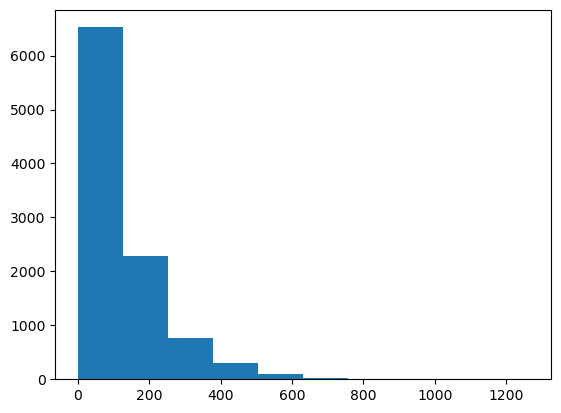

In [47]:
plt.hist(data['precio'])
plt.show()

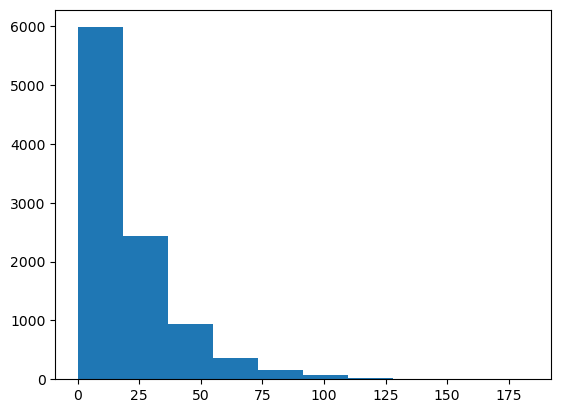

In [48]:
plt.hist(data['valor_flete'])
plt.show()

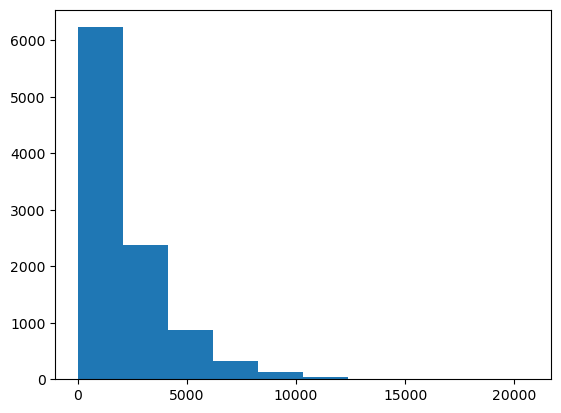

In [49]:
plt.hist(data['peso_g_producto'])
plt.show()

## relacionando columnas

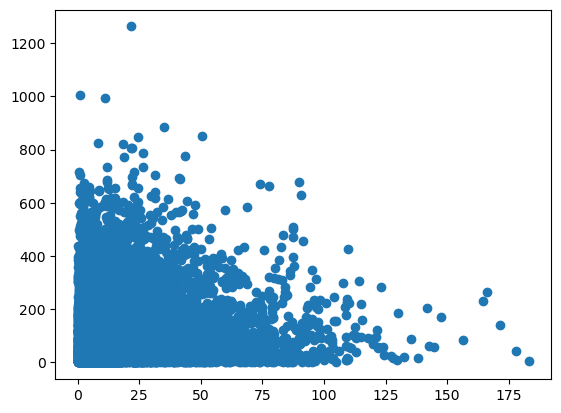

In [50]:
plt.scatter(data['valor_flete'],data['precio'])
plt.show()

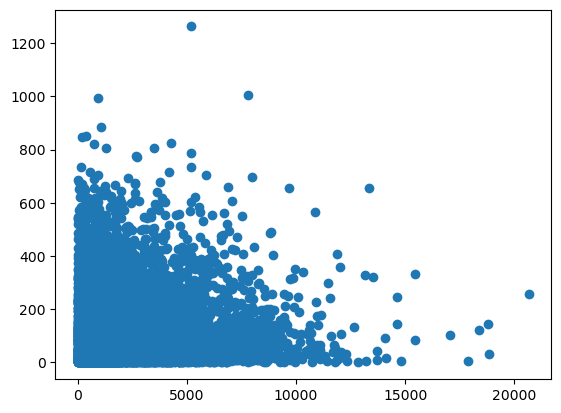

In [51]:
plt.scatter(data['peso_g_producto'],data['precio'])
plt.show()

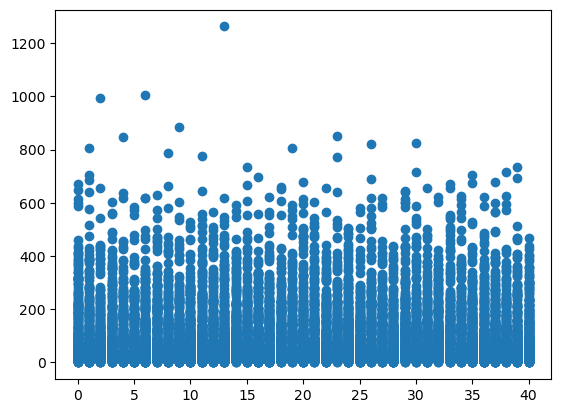

In [52]:
plt.scatter(data['cantidad_fotos_producto'],data['precio'])
plt.show()

In [70]:
### Para Valor de fleteplt.boxplot(data['valor_flete'])
plt.show()
data['precio'].describe()
data['fecha_envio_limite']=pd.to_datetime(data['fecha_envio_limite'])
# poner intervalo de fechas limite 
fecha_inicio="2017-01-01"
fecha_final="2018-01-01"

despues_fecha_inicio=data['fecha_envio_limite']>=fecha_inicio
antes_fecha_final=data['fecha_envio_limite']<=fecha_final
entre_dos_fechas=despues_fecha_inicio & antes_fecha_final

#creamos los datos para graficar
fecha_ventas=data

fecha_ventas['fecha_envio_limite']=fecha_ventas['fecha_envio_limite'].dt.date
fecha_ventas=fecha_ventas[entre_dos_fechas].groupby('fecha_envio_limite')['precio'].sum().reset_index()
fecha_ventas.head()


,fecha_envio_limite,precio
0,2017-01-08,4149.74
1,2017-01-09,4039.02
2,2017-01-10,3816.01
3,2017-01-11,3606.22
4,2017-01-12,3226.42


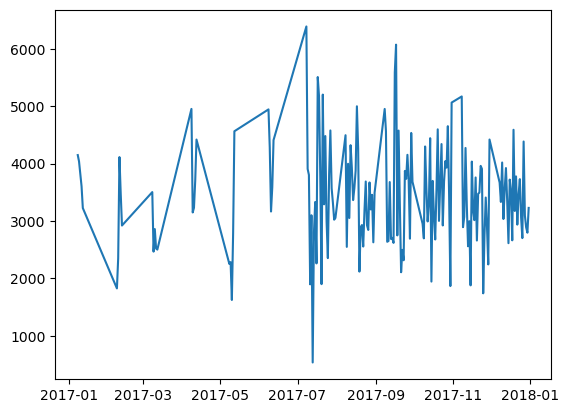

In [71]:
plt.plot(fecha_ventas['fecha_envio_limite'],fecha_ventas['precio'])
plt.show()

In [67]:
ventas_departamento=data.groupby('departamento_vendedor').count()['producto_id'].reset_index()
ventas_departamento.head()

,departamento_vendedor,producto_id
0,Amazonas,141
1,Antioquia,360
2,Arauca,130
3,Atlantico,221
4,Bogota d.c.,175


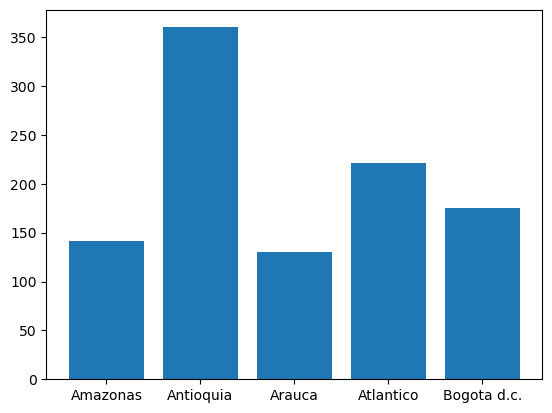

In [68]:
plt.bar(ventas_departamento['departamento_vendedor'].head(5),ventas_departamento['producto_id'].head(5))
plt.show()

In [57]:
ventas_categoria=data.groupby('nombre_categoria_producto').count()['producto_id'].reset_index()
ventas_categoria

,nombre_categoria_producto,producto_id
0,Bebés,470
1,Carnicería,519
2,Celulares,478
3,Deportes,528
4,Dormitorio,507
5,Electrodomésticos,506
6,Ferretería,508
7,Frutas y verduras,526
8,Juguetes,508
9,Libros,492


<function matplotlib.pyplot.show(close=None, block=None)>

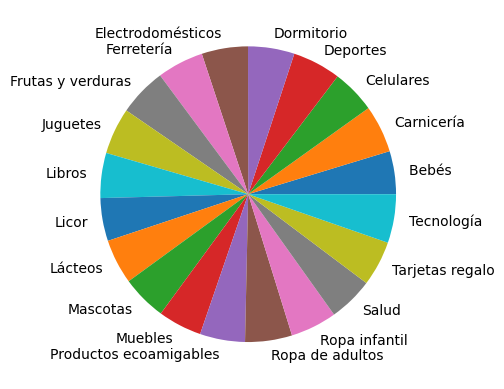

In [65]:
plt.pie(ventas_categoria['producto_id'], labels=ventas_categoria['nombre_categoria_producto'])
plt.show

## Pregunta 2.c
De las columnas elija 3 y calcule la media mediana y moda ademas de su diagrama de bigote

### Para el Valor de flete

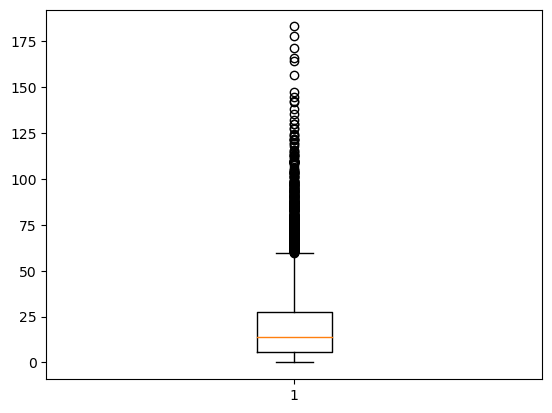

count    10000.000000
mean        19.993050
std         20.036436
min          0.000000
25%          5.740000
50%         13.965000
75%         27.362500
max        183.150000
Name: valor_flete, dtype: float64

In [72]:
plt.boxplot(data['valor_flete'])
plt.show()
data['valor_flete'].describe()

### Para el Peso en gramos de producto

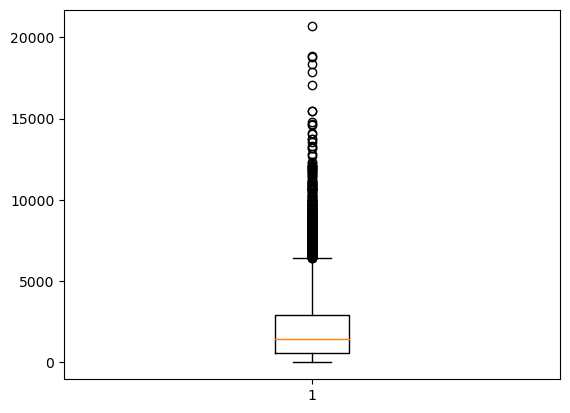

count    10000.000000
mean      2105.585400
std       2095.161775
min          0.000000
25%        607.000000
50%       1458.000000
75%       2934.250000
max      20661.000000
Name: peso_g_producto, dtype: float64

In [73]:
plt.boxplot(data['peso_g_producto'])
plt.show()
data['peso_g_producto'].describe()

### Para el precio

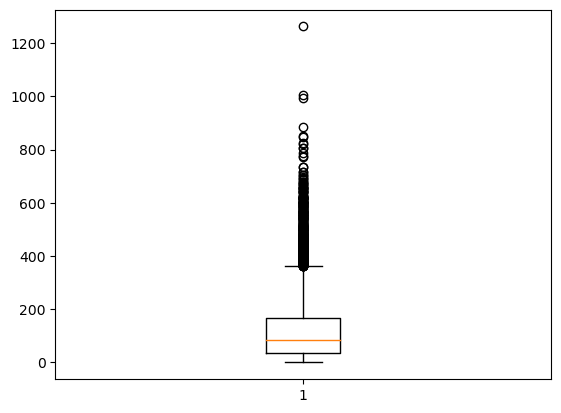

count    10000.000000
mean       119.751497
std        119.319770
min          0.010000
25%         34.177500
50%         83.055000
75%        165.470000
max       1262.940000
Name: precio, dtype: float64

In [74]:
plt.boxplot(data['precio'])
plt.show()
data['precio'].describe()